# Pymaceuticals Inc.
---

### Analysis

>- Males mice are 2% higher risk of developing a tumor.
>- Mouse weight and tumor volume are correlated.
>- A regimen of Capmulin and Ramicane saw the longest 
number of observed mouse timepoints. 


In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="left")
display_data = combined_data.copy()
display_data["Tumor Volume (mm3)"] = display_data["Tumor Volume (mm3)"].astype(float).map("{:.1f}".format)

# Display the data table for preview
display_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.6,2,Capomulin,Male,12,25
1889,u364,45,31.0,3,Capomulin,Male,18,17
1890,p438,45,61.4,1,Ceftamin,Female,11,26
1891,x773,45,58.6,4,Placebo,Female,21,30


In [23]:
# Checking the number of mice.
sum_of_mice = combined_data['Mouse ID'].nunique()
sum_of_mice

249

In [24]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [25]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice_ids)]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[~combined_data["Mouse ID"].isin(duplicate_mice_ids)]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [27]:
# Checking the number of mice in the clean DataFrame.
mice_in_clean_data = clean_data['Mouse ID'].nunique()
mice_in_clean_data

248

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_regimen = clean_data.groupby('Drug Regimen')
mean_tumor = grouped_regimen['Tumor Volume (mm3)'].mean()
median_tumor = grouped_regimen['Tumor Volume (mm3)'].median().round(6)
variance_tumor = grouped_regimen['Tumor Volume (mm3)'].var()
std_dev_tumor = grouped_regimen['Tumor Volume (mm3)'].std()
sem_tumor = grouped_regimen['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": median_tumor,
    "Tumor Volume Variance": variance_tumor,
    "Tumor Volume Std. Dev.": std_dev_tumor,
    "Tumor Volume Std. Err.": sem_tumor
})
summary_stats["Median Tumor Volume"] = summary_stats["Median Tumor Volume"].map("{:,.6f}".format)
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_display = summary_stats_agg.copy()
summary_stats_display['median'] = summary_stats_agg['median'].map('{:.6f}'.format)
summary_stats_display

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

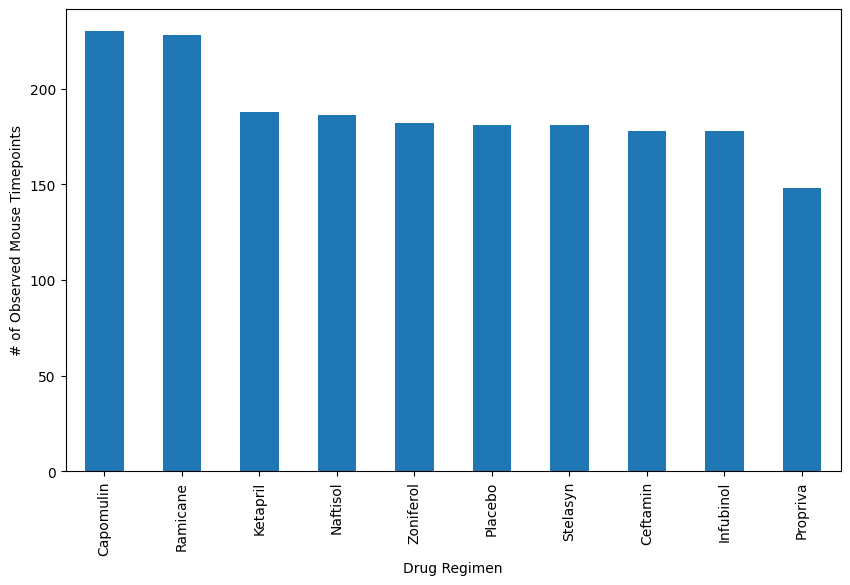

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts_pandas = clean_data.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
regimen_counts_pandas.plot(kind='bar', figsize=(10,6))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()



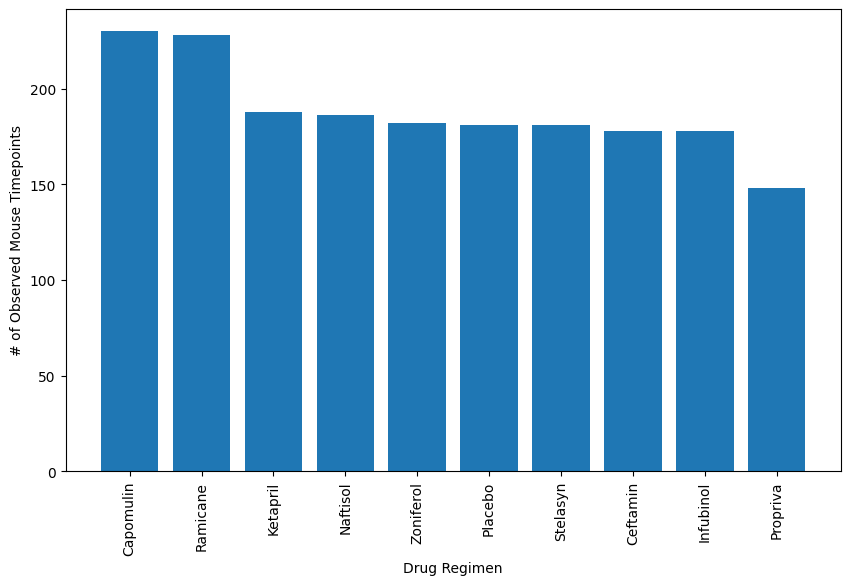

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts_pyplot = clean_data.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
x_values = regimen_counts_pyplot.index
y_values = regimen_counts_pyplot.values

plt.figure(figsize=(10,6))
plt.bar(x_values, y_values)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()


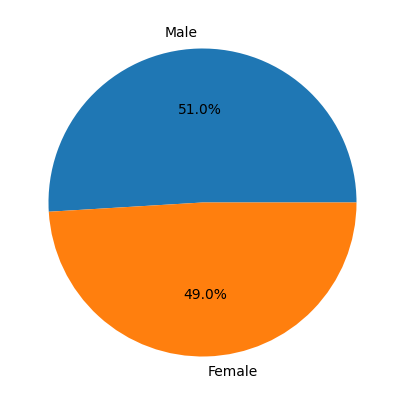

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution_pandas = clean_data['Sex'].value_counts()
sex_distribution_pandas.plot(kind='pie', figsize=(5,5), autopct='%1.1f%%')
plt.ylabel('')
plt.show()

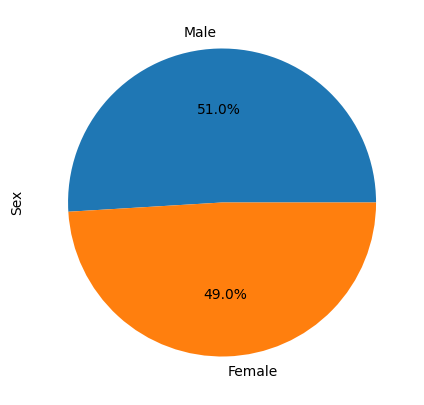

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution_pyplot = clean_data['Sex'].value_counts()
labels = sex_distribution_pyplot.index
sizes = sex_distribution_pyplot.values

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_filter = clean_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
filtered_data = clean_data[treatment_filter]
# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(final_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')

In [38]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volumes = final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_vol_list.append(final_volumes)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = final_volumes.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers
    outliers = final_volumes[(final_volumes < lower_bound) | (final_volumes > upper_bound)]


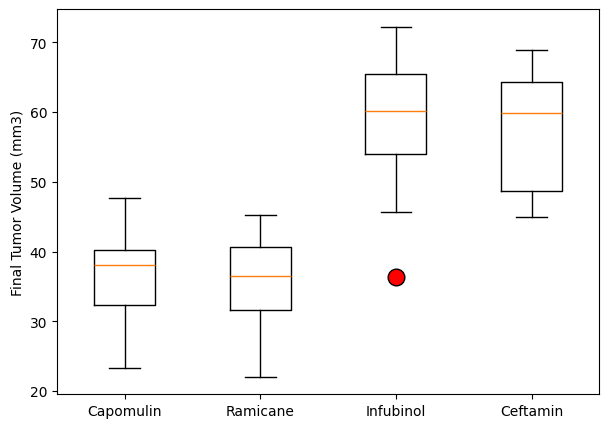

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none')
plt.figure(figsize=(7, 5))
plt.boxplot(tumor_vol_list, labels=treatments, flierprops=flierprops)

plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

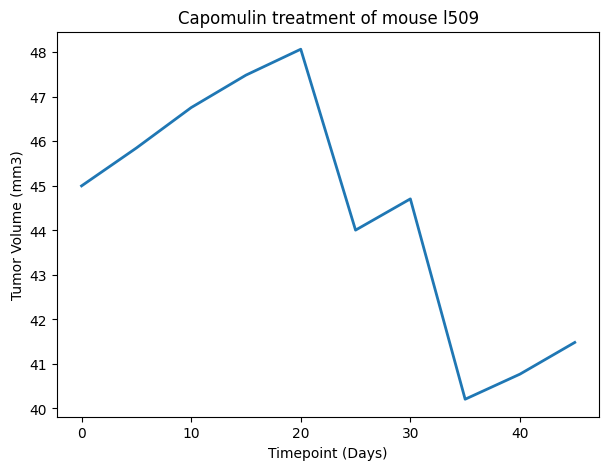

In [40]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
mouse_data = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == mouse_id)]

plt.figure(figsize=(7, 5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-', linewidth=2, markersize=6)

plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


# Display the plot
plt.show()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

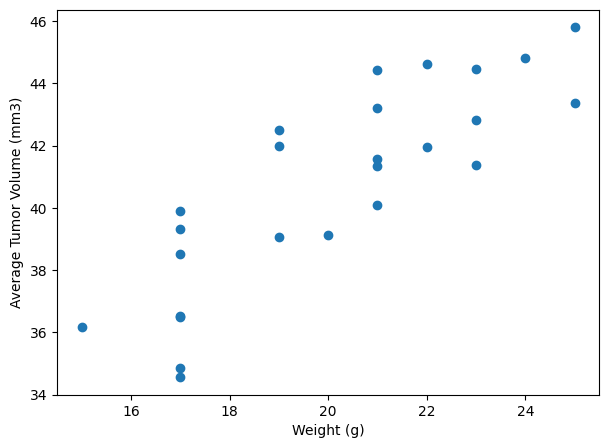

In [41]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
grouped_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)':'mean', 'Weight (g)':'mean'})

plt.figure(figsize=(7, 5))
plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


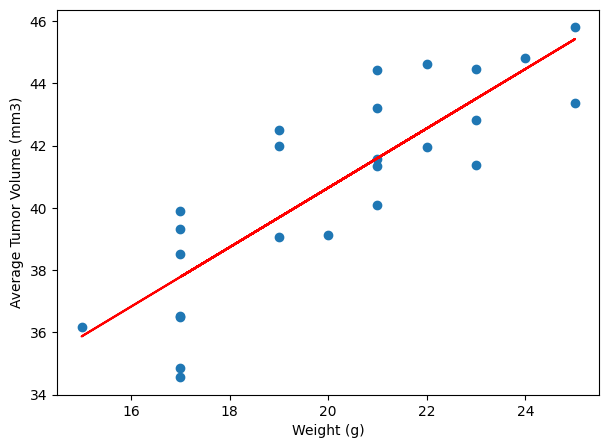

In [42]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate sums and sums of products
sum_x = grouped_data['Weight (g)'].sum()
sum_y = grouped_data['Tumor Volume (mm3)'].sum()
sum_xy = (grouped_data['Weight (g)'] * grouped_data['Tumor Volume (mm3)']).sum()
sum_x_squared = (grouped_data['Weight (g)']**2).sum()
N = len(grouped_data)

# Calculate slope (m) and intercept (b)
m = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x**2)
b = (sum_y - m * sum_x) / N

# Calculate correlation coefficient separately, as it's still allowed
correlation_coef = st.pearsonr(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and average tumor volume is {correlation_coef:.2f}")

# Use m and b to calculate y values for the regression line
regress_values = m * grouped_data['Weight (g)'] + b

# Plot
plt.figure(figsize=(7, 5))
plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])
plt.plot(grouped_data['Weight (g)'], regress_values, 'r-', label='Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()